In [13]:
from __future__ import print_function
import torch

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from mnist import MNIST
import numpy as np

In [ ]:
####### A5 #############

In [2]:
def load_dataset():
    mndata = MNIST('/home/mumu/Desktop/CSE546/hw1/python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_test,labels_test,X_train,labels_train

In [3]:
def one_hot_encode(vector):
    n_classes = len(vector.unique())  # 1
    one_hot = torch.zeros((vector.shape[0], n_classes))\
        .type(torch.LongTensor)  # 2
    return one_hot\
        .scatter(1, vector.type(torch.LongTensor).unsqueeze(1), 1)  # 3

In [4]:
X_test,labels_test,X_train,labels_train=load_dataset()
y_train = torch.from_numpy(labels_train)
y_test = torch.from_numpy(labels_test)

y_one_hot = one_hot_encode(y_train)
X_train_tensor = torch.from_numpy(X_train).double()
n_train,d_train = X_train_tensor.shape
X_test_tensor = torch.from_numpy(X_test).double()
n_test,d_test = X_test_tensor.shape

#W = torch.rand(d, 10, requires_grad=True).double()

In [5]:
######################### separate W and b ######################################
h1 = 64 
h2 = 10
# Wx+b => W -> [w_0 W], x -> [1;x] 
W1 = -2/np.sqrt(h1) * torch.rand( h1 , d_train ).T.double() +  1/np.sqrt(h1) # uiformly between (-1/sqrt(m), 1/sqrt(m))
b1 = ones = -2/np.sqrt(h1) *torch.rand(h1,1).double()+  1/np.sqrt(h1) 
W2 = -2/np.sqrt(h2) * torch.rand( h1 , h2 ).double() +  1/np.sqrt(h2) # uiformly between (-1/sqrt(m), 1/sqrt(m))
b2 = ones = -2/np.sqrt(h2)* torch.ones(h2,1).double()+  1/np.sqrt(h2) 

print(W1.shape)
print(W2.shape)

torch.Size([784, 64])
torch.Size([64, 10])


In [7]:
######################### separate W and b ######################################
epochs=5000
learning_rate = .01
parms = [W1,b1,W2,b2]#list(list(W2)) #+list(W2))
optimizer = torch.optim.Adam(parms, lr=learning_rate)
loss_1 = 0
loss_1_list = []
W1.requires_grad = True
W2.requires_grad = True
b1.requires_grad = True
b2.requires_grad = True

In [8]:
######################### separate W and b ######################################
for epoch in range(epochs):
    # fc1: #64-by-#observation 
    fc1 = F.relu (torch.matmul(W1.double().T,X_train_tensor.T) + b1 ) 

    y_hat =(torch.matmul(W2.double().T, fc1)+b2).T
    # cross entropy combines softmax calculation with NLLLoss

    loss = torch.nn.functional.cross_entropy(y_hat, y_train.long())
    
    # before loss.backwards()
    optimizer.zero_grad()
    
    # computes derivatives of the loss with respect to W
    loss.backward()
    
    optimizer.step()
    loss_1 += loss.item()
    loss_1_list.append(loss_1)
    ##### getting training accuracy ############
    a= (torch.argmax(y_hat,axis=1) - y_train)
    train_accuracy =  a[a==0].shape[0] / n_train
    if (epoch % 10 == 0) :
        print ("training accuracy is {}".format(train_accuracy))
    if train_accuracy >0.99:
        print ("final training accuracy is {}".format(train_accuracy))
        break
#     if epoch % 10 == 0 :
#         print('{},\t{:.2f}'.format(epoch, loss.item()))
#         print("the max of the {} the iteration is {}".format(epoch,torch.max(torch.abs(W1.grad))))
#         print("the max of the {} the iteration is {}".format(epoch,torch.max(torch.abs(W2.grad))))
#     if ((torch.max(torch.abs((W1.grad))) < 0.001 ) and torch.max(torch.abs((W2.grad))) < 0.001 ) :
#         break


##########################################################################
################### evaluate it on the test set ##########################
##########################################################################
fc1_test = F.relu (torch.matmul(W1.double().T,X_test_tensor.T) + b1 ) 
y_test_hat =(torch.matmul( W2.double().T,fc1_test)+b2).T
a= (torch.argmax(y_test_hat,axis=1) - y_test)
test_accuracy =  a[a==0].shape[0] / n_test
print(test_accuracy)

training accuracy is 0.14238333333333333
training accuracy is 0.88495
training accuracy is 0.9154333333333333
training accuracy is 0.9300166666666667
training accuracy is 0.9408666666666666
training accuracy is 0.9492666666666667
training accuracy is 0.9550666666666666
training accuracy is 0.9607666666666667
training accuracy is 0.9653
training accuracy is 0.9696666666666667
training accuracy is 0.9728833333333333
training accuracy is 0.9756
training accuracy is 0.9777166666666667
training accuracy is 0.9801
training accuracy is 0.9818166666666667
training accuracy is 0.9835833333333334
training accuracy is 0.9851
training accuracy is 0.9866333333333334
training accuracy is 0.98805
training accuracy is 0.9892333333333333
final training accuracy is 0.99005
0.968


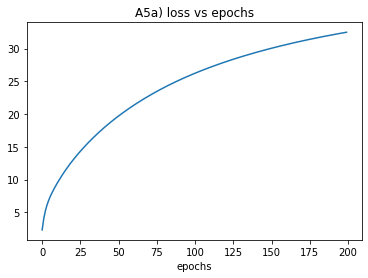

In [27]:
plt.plot(range(epochs),loss_1_list)
plt.title('A5a) loss vs epochs')
plt.xlabel('epochs')
plt.savefig('A5a')

In [34]:
###########################################################################
###########################################################################
######################## A(5)b ############################################
###########################################################################
###########################################################################

In [20]:
######################### separate W and b ######################################
h0 = 32 
h1 = 32
h2 = 10
# Wx+b => W -> [w_0 W], x -> [1;x] 
W0 = -2/np.sqrt(h0) * torch.rand( h0 , d_train ).T.double() +  1/np.sqrt(h0) # uiformly between (-1/sqrt(m), 1/sqrt(m))
b0 = ones = -2/np.sqrt(h0)* torch.ones(h0,1).double()+ 1/np.sqrt(h0) 
W1 = -2/np.sqrt(h1) * torch.rand( h1 , h0 ).double() +  1/np.sqrt(h1) # uiformly between (-1/sqrt(m), 1/sqrt(m))
b1 = ones =-2/np.sqrt(h1)* torch.ones(h1,1).double() +1/np.sqrt(h1) 
W2 = -2/np.sqrt(h2) * torch.rand( h1 , h2 ).double() +  1/np.sqrt(h2) # uiformly between (-1/sqrt(m), 1/sqrt(m))
b2 = -2/np.sqrt(h2)* torch.ones(h2,1).double()+ 1/np.sqrt(h2) 

loss_2 = 0
loss_2_list = []

print(W0.shape)
print(X_train_tensor.shape)
print(W1.shape)
print(W2.shape)

torch.Size([784, 32])
torch.Size([60000, 784])
torch.Size([32, 32])
torch.Size([32, 10])


In [21]:
######################### separate W and b ######################################
epochs=5000
learning_rate = .02
parms = [W1,b1,W2,b2,W0,b0]#list(list(W2)) #+list(W2))
optimizer = torch.optim.Adam(parms, lr=learning_rate)
W0.requires_grad = True
W1.requires_grad = True
W2.requires_grad = True
b0.requires_grad = True
b1.requires_grad = True
b2.requires_grad = True

In [22]:
######################### separate W and b ######################################
for epoch in range(epochs):
    # fc1: #64-by-#observation 
    fc1 = F.relu (torch.matmul(W0.T.double(),X_train_tensor.T) + b0 ) 
    # fc1: 32*6000
    fc2 = F.relu (torch.matmul(W1.T.double(), fc1)+b1)
    
    y_hat =(torch.matmul(W2.T.double(), fc2)+b2).T
    
    # cross entropy combines softmax calculation with NLLLoss

    loss = torch.nn.functional.cross_entropy(y_hat, y_train.long())
    
    # before loss.backwards()
    optimizer.zero_grad()
    
    # computes derivatives of the loss with respect to W
    loss.backward()
    
    optimizer.step()
    loss_2 += loss.item()
    loss_2_list.append(loss_2)
    ##### getting training accuracy ############
    a= (torch.argmax(y_hat,axis=1) - y_train)
    train_accuracy =  a[a==0].shape[0] / n_train
    if (epoch % 10 == 0) :
        print ("training accuracy is {}".format(train_accuracy))
    if train_accuracy >0.99:
        print ("final training accuracy is {}".format(train_accuracy))
        break
#     if epoch % 10 == 0 :
#         print('{},\t{:.2f}'.format(epoch, loss.item()))
#         print("the max of the {} the iteration is {}".format(epoch,torch.max(torch.abs(W1.grad))))
#         print("the max of the {} the iteration is {}".format(epoch,torch.max(torch.abs(W2.grad))))
#     if ((torch.max(torch.abs((W1.grad))) < 0.001 ) and torch.max(torch.abs((W2.grad))) < 0.001 ) :
#         break


##########################################################################
################### evaluate it on the test set ##########################
##########################################################################

fc1_test_2 = F.relu (torch.matmul(W0.double().T,X_test_tensor.T) + b0 ) 
fc2_test_2 = F.relu (torch.matmul(W1.double().T, fc1_test_2+b1))
y_test_hat_2 =(torch.matmul( W2.double().T,fc2_test_2)+b2).T
a= (torch.argmax(y_test_hat_2,axis=1) - y_test)
test_accuracy =  a[a==0].shape[0] / n_test
print(test_accuracy)

training accuracy is 0.12436666666666667
training accuracy is 0.8121666666666667
training accuracy is 0.8941666666666667
training accuracy is 0.9179833333333334
training accuracy is 0.9343833333333333
training accuracy is 0.9450833333333334
training accuracy is 0.9519166666666666
training accuracy is 0.9581
training accuracy is 0.9620666666666666
training accuracy is 0.9661833333333333
training accuracy is 0.9690833333333333
training accuracy is 0.9719833333333333
training accuracy is 0.9744
training accuracy is 0.9765666666666667
training accuracy is 0.9783833333333334
training accuracy is 0.9799666666666667
training accuracy is 0.9820166666666666
training accuracy is 0.9835
training accuracy is 0.9844333333333334
training accuracy is 0.98575
training accuracy is 0.9870666666666666
training accuracy is 0.9884833333333334
training accuracy is 0.9894833333333334
final training accuracy is 0.9904833333333334
0.9595


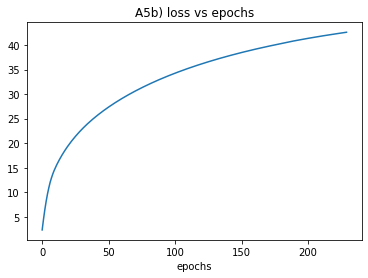

In [28]:
plt.title('A5b) loss vs epochs')
plt.xlabel('epochs')
plt.plot(range(epoch+1),loss_2_list)
plt.savefig('A5b')